# Оценка результатов генерации MuseGAN и GPT-2

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
ans_df = pd.read_csv('answers.csv')

In [13]:
ans_df = ans_df.dropna(axis=1)

In [14]:
ans_df.set_axis(['time','1', 'Musical knowledge', '2', '3','4','5','6'], axis=1, inplace=True)

In [15]:
ans_df

,time,1,Musical knowledge,2,3,4,5,6
0,14.05.2023 19:26:39,7,Да,6,4,3,8,6
1,14.05.2023 19:33:33,6,Нет,7,6,5,6,5
2,14.05.2023 19:41:36,7,Нет,6,3,2,5,6
3,14.05.2023 20:00:36,3,Да,3,3,3,8,8
4,14.05.2023 21:35:59,6,Нет,6,7,6,5,5
5,14.05.2023 21:38:59,7,Да,4,2,3,6,5
6,14.05.2023 21:52:49,4,Нет,4,4,4,4,4
7,14.05.2023 22:07:00,7,Нет,5,7,6,9,8
8,14.05.2023 22:09:35,9,Нет,5,3,4,9,7
9,14.05.2023 22:14:45,10,Нет,8,6,5,10,9


In [16]:
ans_df = ans_df.reindex(columns=['time','Musical knowledge','1','2','3','4','5','6'])

In [17]:
ans_df = ans_df.drop(ans_df[(ans_df['1'] <= 4) & (ans_df['5']<=4)].index)

In [18]:
ans_df = ans_df.drop(ans_df[(ans_df['3'] == 10) & (ans_df['4']==10)].index)

In [19]:
ans_df

,time,Musical knowledge,1,2,3,4,5,6
0,14.05.2023 19:26:39,Да,7,6,4,3,8,6
1,14.05.2023 19:33:33,Нет,6,7,6,5,6,5
2,14.05.2023 19:41:36,Нет,7,6,3,2,5,6
3,14.05.2023 20:00:36,Да,3,3,3,3,8,8
4,14.05.2023 21:35:59,Нет,6,6,7,6,5,5
5,14.05.2023 21:38:59,Да,7,4,2,3,6,5
7,14.05.2023 22:07:00,Нет,7,5,7,6,9,8
8,14.05.2023 22:09:35,Нет,9,5,3,4,9,7
9,14.05.2023 22:14:45,Нет,10,8,6,5,10,9
10,14.05.2023 22:28:28,Нет,9,8,7,5,7,8


In [20]:
samples = ans_df[['1','2','3','4','5','6']].mean()

In [46]:
samples.round(2) 

1    7.18
2    6.45
3    5.36
4    4.55
5    7.36
6    6.50
dtype: float64

In [47]:
models_df = pd.DataFrame()

In [48]:
models_df['Музыкальные теория'] = ans_df['Musical knowledge']
models_df['Реальный образец'] = (ans_df['1']+ans_df['5'])/2
models_df['MuseGAN'] = (ans_df['3']+ans_df['4'])/2
models_df['GPT-2'] = (ans_df['2']+ans_df['6'])/2

In [50]:
mod_mean = models_df[['Реальный образец','MuseGAN','GPT-2']].mean()
mod_mean.round(2) 

Реальный образец    7.27
MuseGAN             4.95
GPT-2               6.48
dtype: float64

Общие данные

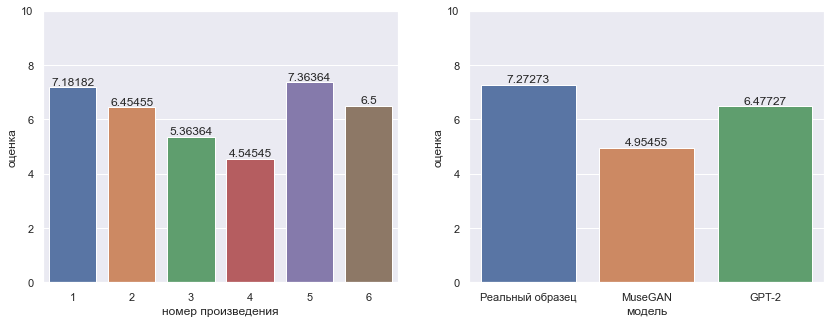

In [54]:
sns.set_theme()
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize =(14,5))
aver = sns.barplot(data=ans_df[['1','2','3','4','5','6']],ax=ax1,ci=None)
aver.set(ylim=(0,10))
aver.set(xlabel ='номер произведения')
aver.set(ylabel ='оценка')
for i in aver.containers:
    aver.bar_label(i,)
models = sns.barplot(data = models_df[['Реальный образец','MuseGAN','GPT-2']],ax=ax2,ci=None)
models.set(ylim=(0,10))
models.set(xlabel ='модель')
models.set(ylabel ='оценка')
for i in models.containers:
    models.bar_label(i,)

Знакомые с музыкальной теорией респонденты

In [55]:
ans_df[ans_df['Musical knowledge']=='Да'][['1','2','3','4','5','6']].mean()

1    6.4
2    6.0
3    4.2
4    4.2
5    8.2
6    6.8
dtype: float64

In [56]:
models_df[models_df['Музыкальные теория']=='Да'][['Реальный образец','MuseGAN','GPT-2']].mean()

Реальный образец    7.3
MuseGAN             4.2
GPT-2               6.4
dtype: float64

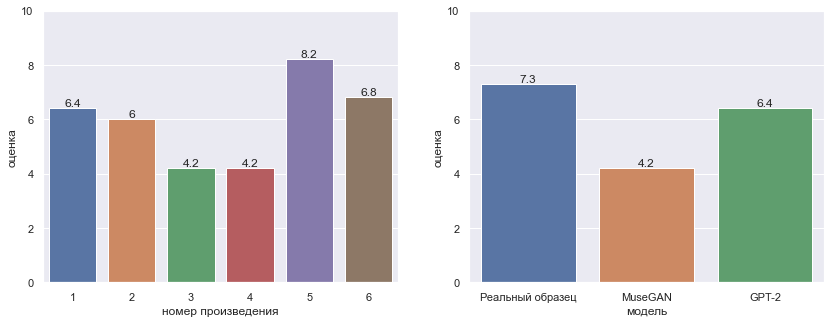

In [66]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize =(14,5))
aver = sns.barplot(data=ans_df[ans_df['Musical knowledge']=='Да'][['1','2','3','4','5','6']],ax=ax1,ci=None)
aver.set(ylim=(0,10))
aver.set(xlabel ='номер произведения')
aver.set(ylabel ='оценка')
for i in aver.containers:
    aver.bar_label(i,)
models = sns.barplot(data = models_df[models_df['Музыкальные теория']=='Да'][['Реальный образец','MuseGAN','GPT-2']],ax=ax2,ci=None)
models.set(ylim=(0,10))
models.set(xlabel ='модель')
models.set(ylabel ='оценка')
for i in models.containers:
    models.bar_label(i,)

Респонденты не изучавшие музыкальную теорию

In [67]:
ans_df[ans_df['Musical knowledge']=='Нет'][['1','2','3','4','5','6']].mean().round(2) 

1    7.41
2    6.59
3    5.71
4    4.65
5    7.12
6    6.41
dtype: float64

In [68]:
models_df[models_df['Музыкальные теория']=='Нет'][['Реальный образец','MuseGAN','GPT-2']].mean().round(2)

Реальный образец    7.26
MuseGAN             5.18
GPT-2               6.50
dtype: float64

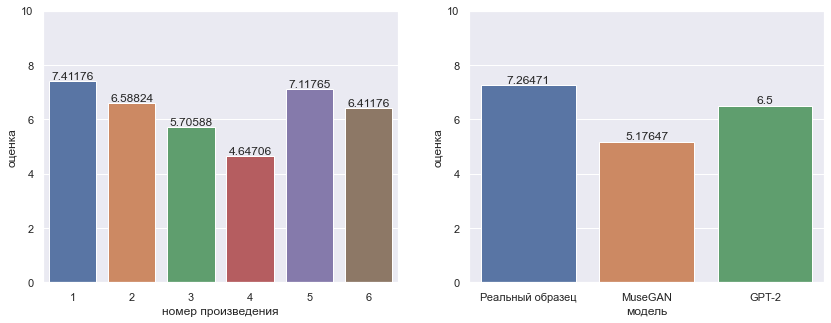

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize =(14,5))
aver = sns.barplot(data=ans_df[ans_df['Musical knowledge']=='Нет'][['1','2','3','4','5','6']],ax=ax1,ci=None)
aver.set(ylim=(0,10))
aver.set(xlabel ='номер произведения')
aver.set(ylabel ='оценка')
for i in aver.containers:
    aver.bar_label(i,)
models = sns.barplot(data = models_df[models_df['Музыкальные теория']=='Нет'][['Реальный образец','MuseGAN','GPT-2']],ax=ax2,ci=None)
models.set(ylim=(0,10))
models.set(xlabel ='модель')
models.set(ylabel ='оценка')
for i in models.containers:
    models.bar_label(i,)

In [71]:
aver_val = pd.DataFrame()

In [83]:
aver_val = pd.concat([samples.round(2),ans_df[ans_df['Musical knowledge']=='Да'][['1','2','3','4','5','6']].mean(),
                    ans_df[ans_df['Musical knowledge']=='Нет'][['1','2','3','4','5','6']].mean().round(2)],axis=1)

In [95]:
aver_val=aver_val.rename(columns={0:'Общая оценка',1:'Знакомые с музыкальной теорией',2:'Не знакомые с музыкальной теорией'})

In [97]:
aver_val.transpose()

,1,2,3,4,5,6
Общая оценка,7.18,6.45,5.36,4.55,7.36,6.50
Знакомые с музыкальной теорией,6.40,6.00,4.20,4.20,8.20,6.80
Не знакомые с музыкальной теорией,7.41,6.59,5.71,4.65,7.12,6.41


In [102]:
aver_val = pd.concat([mod_mean.round(2),models_df[models_df['Музыкальные теория']=='Да'][['Реальный образец','MuseGAN','GPT-2']].mean(),
                      models_df[models_df['Музыкальные теория']=='Нет'][['Реальный образец','MuseGAN','GPT-2']].mean().round(2)],axis=1)

In [103]:
aver_val=aver_val.rename(columns={0:'Общая оценка',1:'Знакомые с музыкальной теорией',2:'Не знакомые с музыкальной теорией'})

In [104]:
aver_val.transpose()

,Реальный образец,MuseGAN,GPT-2
Общая оценка,7.27,4.95,6.48
Знакомые с музыкальной теорией,7.30,4.20,6.40
Не знакомые с музыкальной теорией,7.26,5.18,6.50
